# 0.Utility Functions

In [10]:
# Import libraries
import numpy as np
import pandas as pd
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# These functions are used to get the first date when each compartment stablize and the stable number for each compartment.
######## Get the date when S,I,D start remaining constant, and S,I,D numbers
def get_stable_1(t, S, I, R):
    S_bottom = round(min(S)*100, 2)
    I_peak = round(max(I)*100, 2)
    R_peak = round(max(R)*100, 2)

    i = 0
    while S[i] > min(S):
            i += 1
    S_bottom_date = int(t[i])

    i = 0
    while I[i] < max(I):
            i += 1
    I_peak_date = int(t[i])

    i = 0
    while R[i] < max(R):
            i += 1
    R_peak_date = int(t[i])

    return S_bottom, S_bottom_date, I_peak, I_peak_date, R_peak, R_peak_date



def get_stable_2(t, S, I, R, D):
    S_bottom = round(min(S)*100, 2)
    I_peak = round(max(I)*100, 2)
    R_peak = round(max(R)*100, 2)
    D_peak = round(max(D)*100, 2)

    i = 0
    while S[i] > min(S):
            i += 1
    S_bottom_date = int(t[i])

    i = 0
    while I[i] < max(I):
            i += 1
    I_peak_date = int(t[i])

    i = 0
    while R[i] < max(R):
            i += 1
    R_peak_date = int(t[i])

    i = 0
    while D[i] < max(D):
            i += 1
    D_peak_date = int(t[i])

    return S_bottom, S_bottom_date, I_peak, I_peak_date, R_peak, R_peak_date, D_peak, D_peak_date



# 1.Basic SIR Model

Population size: 1
Infected at t=0: 0.05
R0= 2.5
R_eff=1 at t= 11 d
'Susceptible' reaches bottom on day: 166
'Susceptible' bottom number is: 10.02%
'infected' reaches peak on day: 11
'infected' peak is: 25.35%
'Recovered' reaches peak on day: 166
'Recovered' peak is: 89.98%


<Figure size 432x288 with 0 Axes>

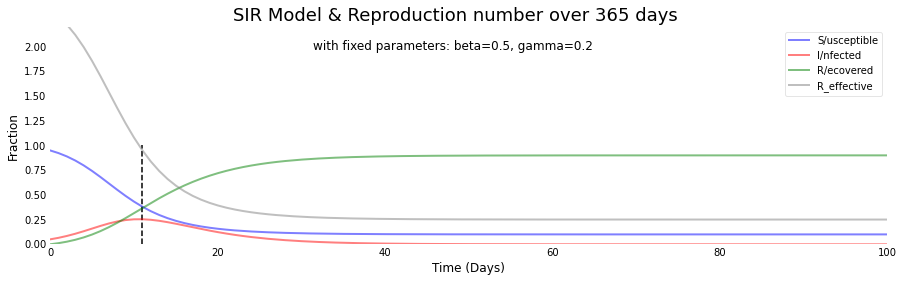

In [21]:
# Basic SIR model (adapted) Jan Nagler (speak Sir Jan Nagler), v2

######## Set Parameters
N = 1 #Population size
I0, R0 = 0.05, 0  #Initial conditions at t=0
S0 = N - I0 - R0 #Normalization

β = 0.5
Ɣ = 0.2
R_nought = β / Ɣ 

t = np.linspace(0, 365, 365) #Set time range: 365 days, Time scale/step: 1 day

######## Original SIR model: 
def deriv_sir(y, t, N, β, Ɣ):
    S, I, R = y
    dSdt = -β * S * I 
    dIdt = β * S * I - Ɣ * I
    dRdt = Ɣ * I
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0 # Initial conditions vectors

ret = odeint(deriv_sir, y0, t, args=(N, β, Ɣ)) #Integration of SIR model
S, I, R = ret.T #Return 3 vectors

######## Get the dates when S,I,R become constant, and S,I,R numbers
S_bottom, S_bottom_date, I_peak, I_peak_date, R_peak, R_peak_date = get_stable_1(t, S, I, R)

######## Find the time when R_effective = 1
t_1 = 0
for time in range(0,len(S)):
    if R_nought*S[time] < 1: 
        t_1 = time
        break

######## Print Info.:
print("Population size:", N)
print("Infected at t=0:", I0)
print ("R0=",round(R_nought,2))
print("R_eff=1 at t=", t_1, "d")
print(f"'Susceptible' reaches bottom on day: {S_bottom_date}")
print(f"'Susceptible' bottom number is: {S_bottom}%")
print(f"'infected' reaches peak on day: {I_peak_date}")
print(f"'infected' peak is: {I_peak}%")
print(f"'Recovered' reaches peak on day: {R_peak_date}")
print(f"'Recovered' peak is: {R_peak}%")

######## Plot the data: 
fig = plt.figure(facecolor='w')
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='S/usceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='I/nfected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='R/ecovered')
ax.plot(t, R_nought*S, 'gray', alpha=0.5, lw=2, label='R_effective')

plt.figtext(.5,.9,f"SIR Model & Reproduction number over {int(t[-1])} days", fontsize=18, ha='center')
plt.figtext(.5,.8,f"with fixed parameters: beta={β}, gamma={Ɣ} ", fontsize=12, ha='center')
ax.set_xlabel('Time (Days)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_ylim(0,2.2)
ax.set_xlim(0,100)

ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# 2.Question-1 (a)

The SIR model is a 3-compartment model.  Extend this model to 4 compartments,  where  the  4th  compartment  is  for  deaths  (D).  Mortality  is modelled by new transitions from I→D defined by the mortality rate μ. Susceptible and Recovered do not die. 

(a) Derive the corresponding system of equations for S, I, R and D. e.g., dDdt = μ*I but this is not the only difference to SIR. In addition, the basic reproduction number may now depend on μ as well, how?

Extended SIRD model:
![pic-1] (pic-1.png)

**Updated list of variables in the model**

N: total population set to 1

S(t): percentage of people susceptible on day t 

I(t): percentage of people infected on day t 

R(t): percentage of people recovered on day t 

D(t): percentage of people dead on day t 

\---------------------------------------------- 

$R^{SIRD}_{0}$: Basic reproduction number

$R^{SIRD}_{e}$: Effective reproduction number

β: The percentage of susceptible people getting infected per day / the infection rate

γ: The percentage of infected people who recover per day / the recovery rate

μ: The percentage of infected people who die per day / the mortality rate

\---------------------------------------------- 

**ODE System**

$\frac{dS}{dt}= -β·I·\frac{S}{N}$

$\frac{dI}{dt}= -β·I·\frac{S}{N}$ - $γ_{sird}$·I - μ·I

$\frac{dR}{dt} =γ_{sird}·I$

$\frac{dD}{dt} =μ·I$

\---------------------------------------------- 

**TAKEAWAY**

$R^{SIRD}_{0}=\frac{β}{γ+μ}$

R_nought is previously measured as β/Ɣ, the number of infection rate over the recovery rate at t=0, which gives a base-line infectiousness of COVID as its fundamental property. R_nought is directly proportional to β and inversely preportional to Ɣ. Therefore, R_nought is dependent on β and Ɣ. 

Taking mortality rate into consideration, represented by the death rate μ, we add one more scenario after infection. Therefore, among β infected people, Ɣ people will recover and μ people will die in a time unit, two independent scenarios after infection. All three parameters are fundamental properties of COVID. To reflect this added scenario, we need to add μ to Ɣ. Now at time 0, R_nought is still directly proportional to β, but inversely proportional to the sum of Ɣ and μ. Therefore, R_nought now is dependent on β, Ɣ and μ. 

$R^{SIRD}_{e}=R^{SIRD}_{0}*\frac{S_{t}}{N}$

The effective reproduction number $R_e$ at day t is calulated as $R^{SIRD}_{e}= R^{SIRD}_{0} * S(t) / N$

Population size: 1
Infected at t=0: 0.05
R0= 2.5
R_eff=1 at t= 11 d
'Susceptible' reaches bottom on day: 166
'Susceptible' bottom number is: 10.02%
'infected' reaches peak on day: 11
'infected' peak is: 25.35%
'Recovered' reaches peak on day: 166
'Recovered' peak is: 67.49%
'Death' reaches peak on day: 166
'Death' peak is: 22.5%


<Figure size 432x288 with 0 Axes>

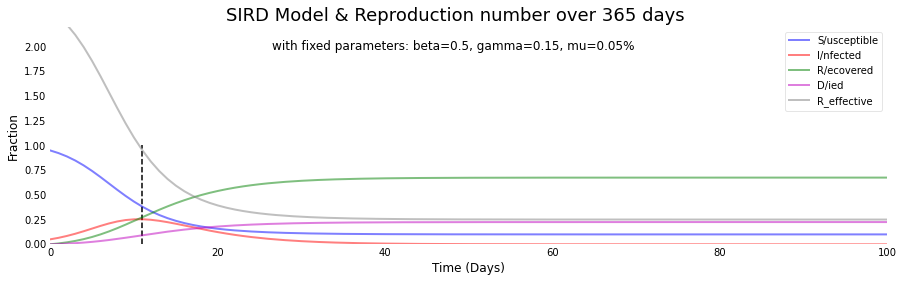

In [23]:
######## Set Parameters
N = 1 #Population size
I0, R0, D0 = 0.05, 0 , 0 #Initial conditions at t=0
S0 = N - I0 - R0 - D0 #Normalization

β = 0.5  
Ɣ = 0.15 
μ = 0.05 
R_nought = β / (Ɣ + μ) 

t = np.linspace(0, 365, 365) #Set time range: 365 days, time scale/step: 1 day

######## SIRD model:
def deriv_sird(y, t, N, β, Ɣ, μ):
    S, I, R, D = y
    dSdt = -β * S * I 
    dIdt = β * S * I - Ɣ * I - μ * I
    dRdt = Ɣ * I
    dDdt = μ * I
    return dSdt, dIdt, dRdt, dDdt

y0 = S0, I0, R0, D0 #Initial conditions vectors

ret = odeint(deriv_sird, y0, t, args=(N, β, Ɣ, μ)) #Integration of SIRD model
S, I, R, D = ret.T #Return 4 vectors

######## Get the dates when S,I,R,D become constant, and S,I,R,D numbers
S_bottom, S_bottom_date, I_peak, I_peak_date, R_peak, R_peak_date, D_peak, D_peak_date = get_stable_2(t, S, I, R, D)

######## Find the time when R_effective = 1
t_1 = 0
for time in range(0,len(S)):
    if R_nought*S[time] < 1:  
        t_1 = time
        break

######## Print Info.:
print("Population size:", N)
print("Infected at t=0:", I0)
print ("R0=",round(R_nought,2))
print("R_eff=1 at t=", t_1, "d")
print(f"'Susceptible' reaches bottom on day: {S_bottom_date}")
print(f"'Susceptible' bottom number is: {S_bottom}%")
print(f"'infected' reaches peak on day: {I_peak_date}")
print(f"'infected' peak is: {I_peak}%")
print(f"'Recovered' reaches peak on day: {R_peak_date}")
print(f"'Recovered' peak is: {R_peak}%")
print(f"'Death' reaches peak on day: {D_peak_date}")
print(f"'Death' peak is: {D_peak}%")

######## Plot the data: 
fig = plt.figure(facecolor='w')
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='S/usceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='I/nfected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='R/ecovered')
ax.plot(t, D, 'm', alpha=0.5, lw=2, label='D/ied')
ax.plot(t, R_nought*S, 'gray', alpha=0.5, lw=2, label='R_effective')

plt.figtext(.5,.9,f"SIRD Model & Reproduction number over {int(t[-1])} days", fontsize=18, ha='center')
plt.figtext(.5,.8,f"with fixed parameters: beta={β}, gamma={Ɣ}, mu={μ} ", fontsize=12, ha='center')
ax.set_xlabel('Time (Days)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_ylim(0,2.2)
ax.set_xlim(0,100)

ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()


## 2.Question-1 (a) TAKEWAY:

Given the same population(N=1), initial infected number of people(I0 = 0.05) and β=0.05, we have following conclusions: 

1. the introduction of mortality rate μ has no effet on the infectiousness of COVID, since only infected people would potentilly die. As seen from two graphs, in both models, $R_{e}%$ takes 11 days to reach 1 and the number of infected people reaches the peak 25.35% in 11 days. 

2. Also, by subtract μ from Ɣ to reflect two independent scenarios, recovery and death, we hold $R^{SIRD}_{0}%$=2.5 constant for both models. As a result, in the SIRD model has roughly 3/4 of infected people recovered and 1/4 of them dead, proportional to Ɣ=0.15 and μ=0.05. So in the two graphs, the "Susceptible", "Infected" and "R_effective" lines are identical, while "Recovered" line is much lower in the second graph as some of the infected people ultimately are dead as represented by the "Die" line. 





# 2.Question-1 (b)

(b) Assume that the basic reproduction number R0 for COVID-B117 is not exactly known but only the range R<sub>0</sub> ∈ \[3.0,4.0]\.  Assume that the mortality rate μ is also not exactly known but only the range μ ∈ \[0.4%,4%]\.  Study how these parameter uncertainties affect the prediction of D at t=365d. What about the cumulative number of deaths after a year?

### **2.1.Change 𝜇 with other variables fixed**

It's given that μ ∈ \[0.4%, 4%] and $R_0$ ∈ \[3.0, 4.0]

We have to carefully select beta and gamma to guarantee that R0 is in \[3.0, 4.0], or satisfies following inequality equations:

$\frac{\beta}{Ɣ+0.004}$ <= 4

$\frac{\beta}{Ɣ+0.04}$ >= 3

By solving the inequality equations, we found:
- Ɣ has to >= 0.104 so that $\beta$ has solutions 
- So we fix Ɣ =0.15 as in the previous question
- With Ɣ =0.15, $\beta$ is in \[0.57, 0.616]
- In following cells, we fix $\beta$ = 0.6 in order to keep $R_0$ ∈ \[3.0, 4.0]




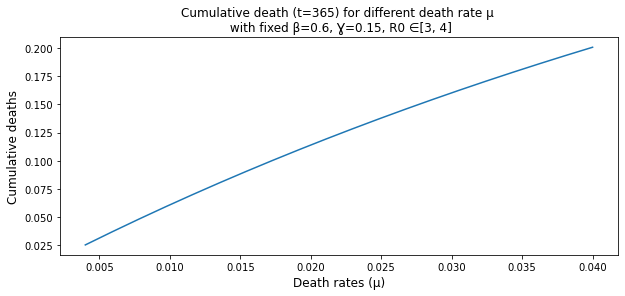


 TAKEAWAY: From the graph above, we can clearly see that with fixed β and Ɣ death number is highly determined by death rate μ with a positive corelation


In [24]:
######## Set Parameters
N = 1 #Population size
I0, R0, D0 = 0.05, 0 , 0 #Initial conditions at t=0
S0 = N - I0 - R0 - D0 #Normalization

β = 0.6 
Ɣ = 0.15 
mu_list = list(np.linspace(0.004, 0.04, 20)) #Create 20 μ in range [0.4%, 4%]

t = np.linspace(0, 365, 365) #Set time range: 365 days, time scale/step: 1 day

y0 = S0, I0, R0, D0 #Initial condition vectors

######## Use for loop to integrate and calculate the Death(at t=365) for different mu
RIP = []
for μ in mu_list:
    ret = odeint(deriv_sird, y0, t, args=(N, β, Ɣ, μ))
    S, I, R, D = ret.T 
    RIP.append(D[-1])

######## Plot the data: 
fig = plt.figure(figsize=(10, 4))
plt.plot(mu_list,RIP)
plt.title(f"Cumulative death (t=365) for different death rate μ \n with fixed β={β}, Ɣ={Ɣ}, R0 ∈[3, 4]", fontsize=12, ha='center')
plt.xlabel("Death rates (μ)", fontsize=12, ha='center')
plt.ylabel("Cumulative deaths", fontsize=12, ha='center')
plt.show()

######## Print takeaway:
print("\033[1m" + '\n TAKEAWAY: ' + "\033[0m" + "From the graph above, we can clearly see that with fixed β and Ɣ death number is highly determined by death rate μ with a positive corelation")

### **2.1.Change $R_0$ with other variables fixed**

It's given that $R_0$ ∈\[3.0,4.0]

For this step, We fix 𝜇 = 0.05 and Ɣ = 0.15

And $R_0$ has to hold: $3 <= \frac{\beta}{\gamma+0.04} <= 4$

Then Beta is decided by $R_0$

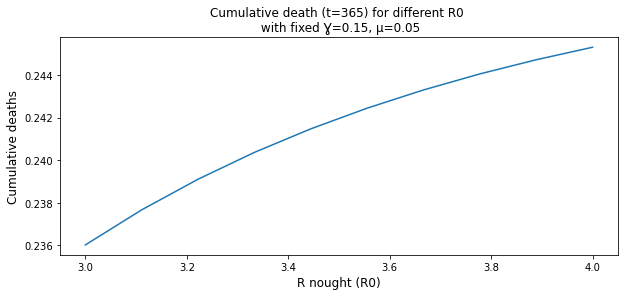


 TAKEAWAY: From the graph above, we can also see a positive effect of R0 on death counts, however, this effect is much less significant than that of μ. Therefore, we decide to further investigate the interaction between R0 and μ, and their combined effect of death counts


In [26]:
######## Set Parameters
N = 1 #Population size
I0, R0, D0 = 0.05, 0 , 0 #Initial conditions at t=0
S0 = N - I0 - R0 - D0 #Normalization

Ɣ = 0.15
μ = 0.05 
R0_list = list(np.linspace(3, 4, 10)) #Define R0 range

t = np.linspace(0, 365, 365) #Set time range: 365 days, time scale/step: 1 day

y0 = S0, I0, R0, D0 #Initial condition vectors

######## Use for loop to integrate and calculate the Death(at t=365) for different mu
RIP = []
for r in R0_list:
    ret = odeint(deriv_sird, y0, t, args=(N, r*(Ɣ+μ), Ɣ, μ))
    S, I, R, D = ret.T 
    RIP.append(D[-1])

######## Plot the Data
fig = plt.figure(figsize=(10, 4))
plt.plot(R0_list,RIP)
plt.title(f"Cumulative death (t=365) for different R0 \n with fixed Ɣ={Ɣ}, μ={μ}", fontsize=12, ha='center')
plt.xlabel("R nought (R0)", fontsize=12, ha='center')
plt.ylabel("Cumulative deaths", fontsize=12, ha='center')
plt.show()

######## Print takeaway:
print("\033[1m" + '\n TAKEAWAY: ' + "\033[0m" + "From the graph above, we can also see a positive effect of R0 on death counts, however, this effect is much less significant than that of μ. Therefore, we decide to further investigate the interaction between R0 and μ, and their combined effect of death counts")

### **2.3.Relationship between R<sub>0</sub> & 𝜇**

- In this section, we fix Ɣ = 0.15

- Create two arrays for μ ∈ \[0.4%,4%] and R<sub>0</sub> ∈\[3.0,4.0]

- Use these two parameter arrays as columns and indexes of a dataframe, which contains the cummulative death at t=365

- Plot the dataframe and investigate the interaction between μ and R<sub>0</sub>

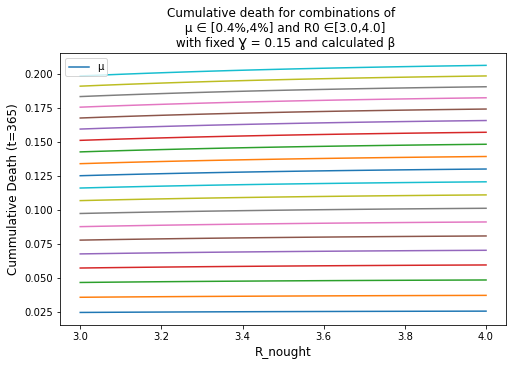


 TAKEAWAY: From the graph above, we can see: with regard to the prediction of cumulative death at year end, R_nought has little impact as each line is almost flat. However, the death number is highly determined by the death rate μ.


In [37]:
######## Set Parameters
N = 1 #Population size
I0, R0, D0 = 0.05, 0 , 0 #Initial conditions at t=0
S0 = N - I0 - R0 - D0 #Normalization

Ɣ = 0.15
y0 = S0, I0, R0, D0 #Initial conditions vector at t=0

t = np.linspace(0, 365, 365) #Set time range: 365 days, time scale/step: 1 day

# Use R_nought ∈ [3.0,4.0] and μ ∈ [0.4%,4%] construct dataframe and get total death for each combination of R_nought and μ 
df = pd.DataFrame(index=np.linspace(3, 4, 20), #R_nought
                  columns=np.linspace(0.004, 0.04, 20)) #mu

######## Modeling and integration:
for r in df.index:
    for μ in df.columns:
        β = r*(Ɣ + μ) #Calculate β from the other 3 parameters
        
        #Integrate the SIRD equations over the time grid t
        ret = odeint(deriv_sird, y0, t, args=(N, β, Ɣ, μ))
        S, I, R, D = ret.T 
        df.loc[r,[μ]]= D[-1] #Put each death number (t=365) into a cell corresponding to each combination of R_nought and μ 

######## Plot the data:
fig = plt.figure(figsize=(8, 5))
plt.plot(df.index, df)b
plt.title(f"Cumulative death for combinations of \n μ ∈ [0.4%,4%] and R0 ∈[3.0,4.0]\n with fixed Ɣ = {Ɣ} and calculated β", fontsize=12, ha='center')
plt.xlabel("R_nought", fontsize=12, ha='center')
plt.ylabel("Cummulative Death (t=365)", fontsize=12, ha='center')
plt.legend('μ', ncol=2, loc='upper left')
plt.show()

######## Print takeaway:
print("\033[1m" + '\n TAKEAWAY: ' + "\033[0m" + "From the graph above, we can see: with regard to the prediction of cumulative death at year end, R_nought has little impact as each line is almost flat. However, the death number is highly determined by the death rate μ.")

- In this section, for each μ we calculate the maximum death number with the highest $R_0$=4, and the minimum death number with the lowest $R_0$=3

- Then we calculate the difference between the maximum and minimum to simulate the impact of $R_0$ on death number under the influence of different μ

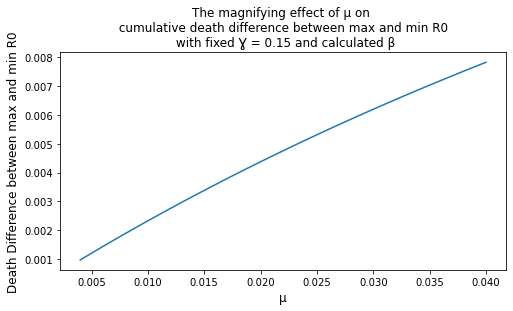


 TAKEAWAY: There is one interesting finding about the interaction of μ and R_nought: as μ increases, the effect of R_noght on death, silmulated by maximum death number associated with highest R_nought=4 minus minimum death number associated with low R_nought=3, is increasing as well. Therefore, μ magnifies the impact of R_nought on death. The higher the μ value, the larger impact R_nought can make to the cumulative death number


In [43]:
stat = df.astype(float).describe()
spread = stat.loc['max'] - stat.loc['min']

######## Plot the data:
fig = plt.figure(figsize=(8, 4))
plt.plot(stat.columns, spread)
plt.title(f"The magnifying effect of μ on \n cumulative death difference between max and min R0 \n with fixed Ɣ = {Ɣ} and calculated β", fontsize=12, ha='center')
plt.xlabel("μ", fontsize=12, ha='center')
plt.ylabel("Death Difference between max and min R0", fontsize=12, ha='center')
plt.show()

######## Print takeaway:
print("\033[1m" + '\n TAKEAWAY: ' + "\033[0m" + "There is one interesting finding about the interaction of μ and R_nought: as μ increases, the effect of R_noght on death, silmulated by maximum death number associated with highest R_nought=4 minus minimum death number associated with low R_nought=3, is increasing as well. Therefore, μ magnifies the impact of R_nought on death. The higher the μ value, the larger impact R_nought can make to the cumulative death number")

### **2.4.Ploting the R<sub>e</sub>**
Finally, we plot the final scenario where $R_0$=4, Ɣ=0.15, μ=0.04 and the calculated β=0.76

Population size: 1
Infected at t=0: 0.05
R0= 4.0
R_eff=1 at t= 8 d
'Susceptible' reaches bottom on day: 142
'Susceptible' bottom number is: 1.88%
'infected' reaches peak on day: 7
'infected' peak is: 41.59%
'Recovered' reaches peak on day: 142
'Recovered' peak is: 77.47%
'Death' reaches peak on day: 142
'Death' peak is: 20.66%


<Figure size 432x288 with 0 Axes>

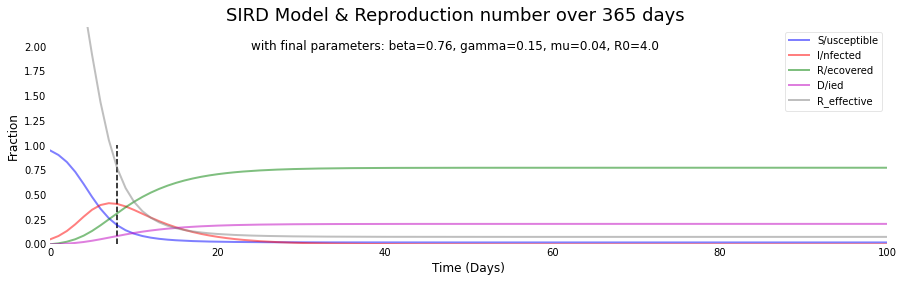

In [51]:
R_nought = β/(Ɣ+μ)

######## Get the dates when S,I,R,D become constant, and S,I,R,D numbers
S_bottom, S_bottom_date, I_peak, I_peak_date, R_peak, R_peak_date, D_peak, D_peak_date = get_stable_2(t, S, I, R, D)

######## Find the time when R_effective = 1
t_1 = 0
for time in range(0,len(S)):
    if R_nought*S[time] < 1:  
        t_1 = time
        break

######## Print Info.:
print("Population size:", N)
print("Infected at t=0:", I0)
print ("R0=",round(R_nought,2))
print("R_eff=1 at t=", t_1, "d")
print(f"'Susceptible' reaches bottom on day: {S_bottom_date}")
print(f"'Susceptible' bottom number is: {S_bottom}%")
print(f"'infected' reaches peak on day: {I_peak_date}")
print(f"'infected' peak is: {I_peak}%")
print(f"'Recovered' reaches peak on day: {R_peak_date}")
print(f"'Recovered' peak is: {R_peak}%")
print(f"'Death' reaches peak on day: {D_peak_date}")
print(f"'Death' peak is: {D_peak}%")

######## Plot the data: 
fig = plt.figure(facecolor='w')
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='S/usceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='I/nfected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='R/ecovered')
ax.plot(t, D, 'm', alpha=0.5, lw=2, label='D/ied')
ax.plot(t, R_nought*S, 'gray', alpha=0.5, lw=2, label='R_effective')

plt.figtext(.5,.9,f"SIRD Model & Reproduction number over {int(t[-1])} days", fontsize=18, ha='center')
plt.figtext(.5,.8,f"with final parameters: beta={β}, gamma={Ɣ}, mu={μ}, R0={R_nought}", fontsize=12, ha='center')
ax.set_xlabel('Time (Days)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_ylim(0,2.2)
ax.set_xlim(0,100)

ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()


# 2.Question-1 (c)

(c) Study numerically the effects of a hard versus soft lockdown (measured by two of  your  reasonable  choices of β),  in  terms  of D(365d).   What  about  the cumulative  number  of  deaths  after  a  year?   Assume μ = 1%  and  a γ compatible with R0= 4.

- In this section, we first assume the lockdown becomes effective immediately when some people(I0 = 0.07) are infected on t=0
- Then we explore the effect of a hard lockdown (high β) with that of a soft lockdown (low β)
- We fix R0=4, μ=0.05 and pick two β, 0.5 and 0.1, then calculate the Ɣ

Population size: 1
Infected at t=0: 0.05
R0= 1.5
R_eff=1 at t= 15 d
'Susceptible' reaches bottom on day: 272
'Susceptible' bottom number is: 36.83%
'infected' reaches peak on day: 15
'infected' peak is: 9.72%
'Recovered' reaches peak on day: 272
'Recovered' peak is: 47.38%
'Death' reaches peak on day: 272
'Death' peak is: 15.79%


<Figure size 432x288 with 0 Axes>

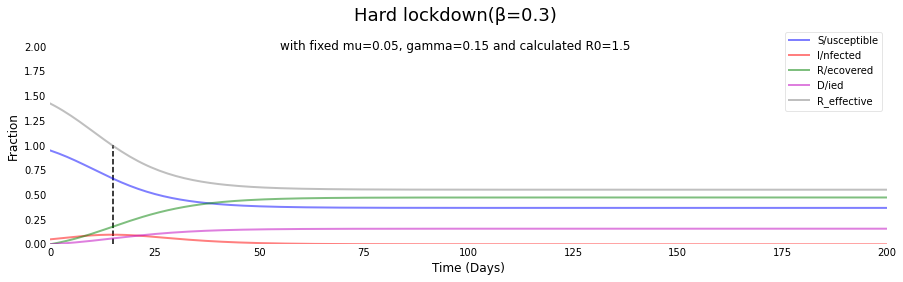

Population size: 1
Infected at t=0: 0.05
R0= 4.0
R_eff=1 at t= 7 d
'Susceptible' reaches bottom on day: 135
'Susceptible' bottom number is: 1.88%
'infected' reaches peak on day: 7
'infected' peak is: 41.58%
'Recovered' reaches peak on day: 135
'Recovered' peak is: 73.59%
'Death' reaches peak on day: 135
'Death' peak is: 24.53%


<Figure size 432x288 with 0 Axes>

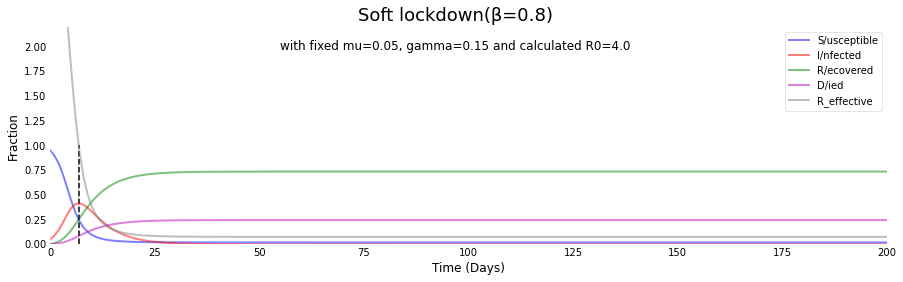


 TAKEAWAY: We can clearly see that a hard lockdown leads to much less infections and much lower death number, and it also takes longer time for R_effective to reach 1 when compared to a soft lockdown


In [79]:
N = 1 #Population size
I0, R0, D0 = 0.05, 0, 0 #Initial conditions t=0
S0 = N - I0 - R0 - D0 #Normalization

Ɣ = 0.15
μ = 0.05 
β_dict = {'Hard': 0.3, 'Soft': 0.8}

t = np.linspace(0, 365, 365) #Set time range: 365 days, time scale/step: 1 day

y0 = S0, I0, R0, D0 #Initial conditions vector

######## Calculate and plot using two Betas
for k,β in β_dict.items():
    R_nought = round(β /(Ɣ + μ), 2)

    # Integrate the SIRD equations over the time grid t. args takes all parameters
    ret = odeint(deriv_sird, y0, t, args=(N, β, Ɣ, μ))
    S, I, R, D = ret.T #Return 4 vectors

    
    ######## Get the dates when S,I,R,D become constant, and S,I,R,D numbers
    S_bottom, S_bottom_date, I_peak, I_peak_date, R_peak, R_peak_date, D_peak, D_peak_date = get_stable_2(t, S, I, R, D)

    ######## Find the time when R_effective = 1
    t_1 = 0
    for time in range(0,len(S)):
        if R_nought*S[time] < 1:  
            t_1 = time
            break

    ######## Print Info.:
    print("Population size:", N)
    print("Infected at t=0:", I0)
    print ("R0=",round(R_nought,2))
    print("R_eff=1 at t=", t_1, "d")
    print(f"'Susceptible' reaches bottom on day: {S_bottom_date}")
    print(f"'Susceptible' bottom number is: {S_bottom}%")
    print(f"'infected' reaches peak on day: {I_peak_date}")
    print(f"'infected' peak is: {I_peak}%")
    print(f"'Recovered' reaches peak on day: {R_peak_date}")
    print(f"'Recovered' peak is: {R_peak}%")
    print(f"'Death' reaches peak on day: {D_peak_date}")
    print(f"'Death' peak is: {D_peak}%")

    ######## Plot the data: 
    fig = plt.figure(facecolor='w')
    fig = plt.figure(figsize=(15, 4))
    ax = fig.add_subplot(111, axisbelow=True)
    ax.plot(t, S, 'b', alpha=0.5, lw=2, label='S/usceptible')
    ax.plot(t, I, 'r', alpha=0.5, lw=2, label='I/nfected')
    ax.plot(t, R, 'g', alpha=0.5, lw=2, label='R/ecovered')
    ax.plot(t, D, 'm', alpha=0.5, lw=2, label='D/ied')
    ax.plot(t, R_nought*S, 'gray', alpha=0.5, lw=2, label='R_effective')

    plt.figtext(.5,.9,f"{k} lockdown(β={β})", fontsize=18, ha='center')
    plt.figtext(.5,.8,f"with fixed mu={μ}, gamma={Ɣ} and calculated R0={R_nought}", fontsize=12, ha='center')
    ax.set_xlabel('Time (Days)', fontsize=12)
    ax.set_ylabel('Fraction', fontsize=12)
    ax.set_ylim(0,2.2)
    ax.set_xlim(0,200)

    ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()

######## Print takeaway:
print("\033[1m" + '\n TAKEAWAY: ' + "\033[0m" + "We can clearly see that a hard lockdown leads to much less infections and much lower death number, and it also takes longer time for R_effective to reach 1 when compared to a soft lockdown")